<a href="https://colab.research.google.com/github/Ankur099IIT/Natural-Language-Processing-Course-3-Deeplearning.ai/blob/main/Generating_text_with_Neural_Networks_(Make_your_own_song).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list

corpus = data.lower()
corpus = corpus.split("\n")

# Preview the result
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index)+1

In [12]:
print(tokenizer.word_index) # a dictionary of word/key and index/value

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [19]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0] # line is a string and text_to_sequence that we applied in the past is on strings inside a list. [0] is to remove the second braket
  for i in range(1, len(token_list)):
    input_sequences.append(token_list[:i+1])

print(input_sequences)

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70], [71, 40], [71, 40, 20], [71, 40, 20, 21], [71, 40, 20, 21, 72], [71, 40, 20, 21, 72, 3], [71, 40, 20, 21, 72, 3, 73], [16, 74], [16, 74, 75], [16, 74, 75, 1], [16, 74, 75, 1, 76], [16, 74, 75, 1, 76, 33], [16, 74, 75, 1, 76, 33, 3], [16, 74, 75, 1, 76, 33, 3, 77], [16, 74, 75, 1, 76, 33, 3, 77, 22], [41, 33], [41, 33, 3], [41, 33, 3, 78], [41, 33, 3, 78, 1], [41, 33, 3, 78, 1, 79], [41, 33, 3, 78, 1, 79, 80], [41, 33, 3, 78, 1, 79, 80, 8], [41, 33, 3, 78, 1, 79, 80, 8, 81], [21, 82], [21, 82, 3], [21, 82, 3, 83], [21, 82, 3, 83, 84], [21, 82, 3, 83, 84, 7], [21, 82, 3, 83, 84, 7, 42], [21, 82, 3, 83, 84, 7, 42, 1], [21, 82, 3, 83, 84, 7, 42, 1, 43], [85, 86], [85, 86, 87], [85, 86, 87, 33], [85, 86, 87, 33, 44], [85, 86, 87, 33, 44, 88], [85, 86, 87, 33, 44, 88, 13], [85, 86, 87, 33, 44, 88, 13, 2], [85, 86, 87, 33, 44, 88, 13, 2, 45], [1, 89], [1, 89,

In [25]:
list = []
for x in input_sequences:
  list.append(len(x))


In [26]:
print(list)

[2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 2, 

In [28]:
max_sequence_len = max(list)
max_sequence_len

11

In [31]:
input_sequences = pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre')

print(input_sequences[:10])
input_sequences.shape

[[ 0  0  0  0  0  0  0  0  0  4  2]
 [ 0  0  0  0  0  0  0  0  4  2 66]
 [ 0  0  0  0  0  0  0  4  2 66  8]
 [ 0  0  0  0  0  0  4  2 66  8 67]
 [ 0  0  0  0  0  4  2 66  8 67 68]
 [ 0  0  0  0  4  2 66  8 67 68 69]
 [ 0  0  0  4  2 66  8 67 68 69 70]
 [ 0  0  0  0  0  0  0  0  0 71 40]
 [ 0  0  0  0  0  0  0  0 71 40 20]
 [ 0  0  0  0  0  0  0 71 40 20 21]]


(453, 11)

In [32]:
xs, labels = input_sequences[:,:-1], input_sequences[:, -1]

In [35]:
print(xs)

[[  0   0   0 ...   0   0   4]
 [  0   0   0 ...   0   4   2]
 [  0   0   0 ...   4   2  66]
 ...
 [  0   0   0 ...  61  60 262]
 [  0   0   0 ...  60 262  13]
 [  0   0   0 ... 262  13   9]]


In [36]:
print(labels)

[  2  66   8  67  68  69  70  40  20  21  72   3  73  74  75   1  76  33
   3  77  22  33   3  78   1  79  80   8  81  82   3  83  84   7  42   1
  43  86  87  33  44  88  13   2  45  89  90  91  92  93  94  95  96  97
   2  98   1   2  99   8   9  10  13 100 101  23 102 103   5   2  47  17
   1  24   6 104 105  48   4   3 106 107  42   1  43  49  25  50  18 108
  25   3 109 111  26  47 112 113  51  52   3 114   7  13 115  27   3 116
   6  53 117 118 119 120   4  54   7   9  10  11 121   8 122   1 123   7
   2 124   1 126  28  34 127   1 128  11   2 129 130 131   2  17   1  49
  40  19 134  25  18 135  18 136 137  26 138 139   4 140  55 141 143 144
   1   2 145 146 147 148 149  12   9  10  11 150   5 151   8 152 153  25
   2 154   4   3 155   1   6 157 158  56 159  51  57   2 160   8   3 161
   1   3 162 164 165   2  17  23   5 166  12  52  20 167 168   2 169 170
 171   6  35  29  30  12 172 173  37  38   7   9  10  39  30   6  35  31
   4  59  39  30  13 174 175  12   5  39  30   6  3

In [53]:
xs.shape, labels.shape # so there are 453 lines and training data has 2-D array with 1D array of labels

((453, 10), (453,))

In [54]:
# convert the labels into one-hot arrays
import tensorflow as tf
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [55]:
print(ys), len(ys)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(None, 453)

In [58]:
ys.shape, ys[0]

((453, 263),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [41]:
# get sample sentence

sentence = corpus[0]

In [42]:
sentence

'in the town of athy one jeremy lanigan '

In [43]:
sentence = sentence.split()

In [44]:
sentence

['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']

In [45]:
tokenizer.word_index['in']

4

In [46]:
token_list = []

for word in sentence:
  token_list.append(tokenizer.word_index[word])

In [47]:
print(token_list)

[4, 2, 66, 8, 67, 68, 69, 70]


In [52]:
xs[6], labels[6]

(array([ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69], dtype=int32), 70)

In [61]:
tokenizer.sequences_to_texts([xs[6]]) # reverse can be done for texts_to_sequences

['in the town of athy one jeremy']

In [64]:
import numpy as np
np.argmax(ys[6]) # this returns the index of '1' amoung zeros after one-hot encoded ys

70

In [65]:
# Build the model

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len - 1),   # max_sequence_len - 1 (number of columns in xs/training_data shape)                  
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(total_words, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            16832     
                                                                 
 bidirectional (Bidirectiona  (None, 40)               13600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = model.fit(xs, ys, epochs = 500)

Epoch 1/500
15/15 [==============================] - 8s 10ms/step - loss: 5.5668 - accuracy: 0.0265
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5364 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 5.4535 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 10ms/step - loss: 5.2675 - accuracy: 0.0552
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 5.1160 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0741 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0468 - accuracy: 0.0486
Epoch 8/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0224 - accuracy: 0.0552
Epoch 9/500
15/15 [==============================] - 0s 9ms/step - loss: 4.9968 - accuracy: 0.0596
Epoch 10/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9712 - accuracy: 0.0486
Epoch

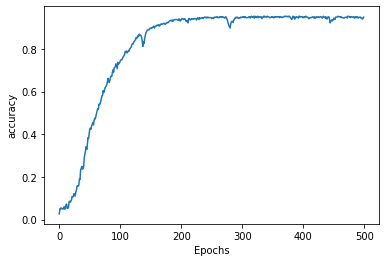

In [68]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [88]:
# Make your song

seed_text = 'Ankur went to Dublin'

next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre') # here max_sequence_len-1 because we want only 10 columns in test data as we did in train data 'xs'

print(token_list)

[[  0   0   0   0   0   0   0 134  13  59]]


In [89]:
for _ in range(next_words):
  probabilities = model.predict(token_list)

In [90]:
print(probabilities)

[[1.71288590e-07 2.30266410e-03 3.80367227e-02 1.55843934e-03
  7.28735477e-02 3.37145627e-02 1.12664049e-04 1.65208286e-04
  1.25453575e-02 4.02644830e-04 5.83734327e-05 1.55668296e-02
  9.13469493e-03 1.06760638e-03 5.94361481e-05 1.54646710e-04
  4.72137965e-02 3.64019535e-02 2.07407531e-04 2.86873907e-01
  8.86890863e-04 1.79065228e-03 1.13329797e-05 1.73721332e-02
  9.65832351e-06 2.00570989e-02 2.06054872e-04 1.31880326e-04
  2.53618753e-04 4.69056286e-05 7.92044830e-07 2.83046626e-02
  6.25236891e-04 2.71836849e-04 1.10630528e-04 9.92929214e-04
  9.59362225e-08 1.10075642e-04 4.83364100e-04 2.84863927e-06
  1.08923516e-04 1.89138053e-04 6.78369497e-06 3.18612706e-07
  4.38333867e-04 2.67602736e-05 1.27838561e-07 3.74822266e-05
  3.34234574e-05 1.36016786e-01 4.22696285e-05 5.35524567e-04
  5.06220749e-05 6.99658049e-05 5.35807293e-03 2.95927407e-07
  2.40262540e-04 5.08824232e-05 3.83900478e-05 2.17760957e-04
  6.40245620e-04 8.76307058e-06 1.72202720e-03 7.12608307e-05
  6.0796

In [91]:
len(probabilities)

1

In [92]:
# index with highest probability
for _ in range(next_words):
  predicted = np.argmax(probabilities, axis = -1)[0]

In [93]:
predicted

19

In [94]:
# Ignore if index is 0 because that is just the padding

for _ in range(next_words):
  if predicted != 0:

    output_words = tokenizer.index_word[predicted]

    seed_text = seed_text + ' ' + output_words

print(seed_text)

Ankur went to Dublin they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they they


In [95]:
# Define seed text
seed_text = "Ankur went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

Ankur went to Dublin dancing away all round a reel them and me a jig rose brothers a call man me friends her wall relations groups man entangled again her call call whirligig wall wall man i a jig small further further mchugh hall minute entangled entangled groups groups wall runctions brooks old hall hall hall brothers ball ball groups groups wall wall hearty entangled entangled again runctions doing out the girls and hearty hearty hearty hearty taras old polkas lads ask ned brothers lanigans for ball and gathered brooks pound might table nonsense eyes water gathered a farm all steps they lanigans and
